In [1]:
import pandas as pd
import numpy as np

import cv2
import io
from glob import glob
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
def create_cnn():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(1024, 1024, 3)))
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  
  model.add(tf.keras.layers.MaxPooling2D(strides=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.5))
  
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
  
  model.add(tf.keras.layers.MaxPooling2D(strides=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.5))
  
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
  
  model.add(tf.keras.layers.MaxPooling2D(strides=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.5))
  
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(1024, activation='relu'))

  return model

In [3]:
horizontal_model = create_cnn()
vertical_model = create_cnn()

2023-11-17 13:58:43.688092: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-17 13:58:43.688112: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-17 13:58:43.688118: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-17 13:58:43.688148: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-17 13:58:43.688164: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[3810304,1024] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator Simple allocator [Op:StatelessRandomUniformV2] name: 

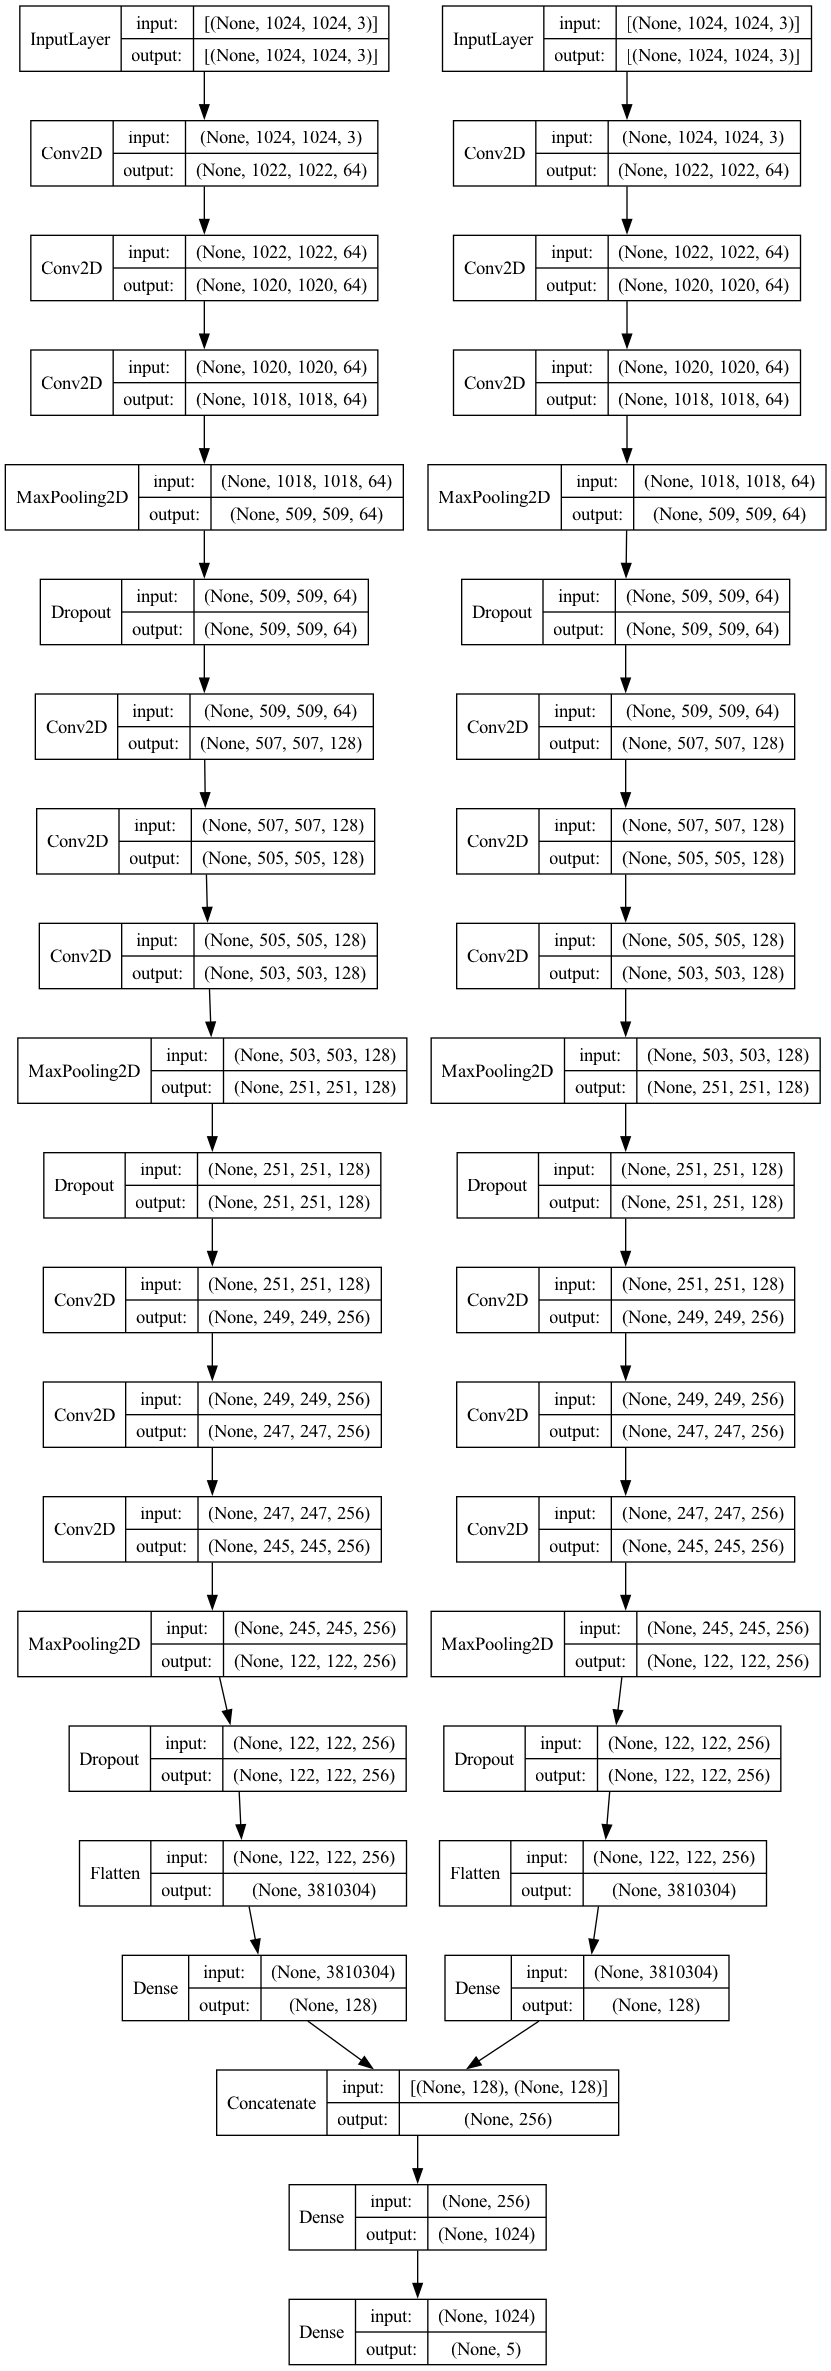

In [ ]:
combinedInput = tf.keras.layers.concatenate([horizontal_model.output, vertical_model.output])

dense1 = tf.keras.layers.Dense(1024, activation="relu")(combinedInput) # Add a dense layer post stacking
dense2 = tf.keras.layers.Dense(5, activation="relu")(dense1)
final_layer = tf.keras.layers.Dense(5, activation="softmax")(dense2)
model = tf.keras.models.Model(inputs=[horizontal_model.input, vertical_model.input],
              outputs=final_layer)

tf.keras.utils.plot_model(model, show_layer_names = False, show_shapes = True)